In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('Bengaluru_House_Data.csv')
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
data.shape

(13320, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
# Checking null values presnet in the dataset
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
# Filling missing values 
data['location'].fillna(data['location'].mode()[0], inplace=True) # Categorical Column
data['bath'].fillna(data['bath'].median(), inplace=True)
data['balcony'].fillna(data['balcony'].median(), inplace=True)
data['size'].fillna(data['size'].mode()[0], inplace=True) # Categorical Column

C:\Users\Anubhav Prasad\AppData\Local\Temp\ipykernel_15732\2315850797.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['location'].fillna(data['location'].mode()[0], inplace=True) # Categorical Column
C:\Users\Anubhav Prasad\AppData\Local\Temp\ipykernel_15732\2315850797.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which 

In [7]:
data.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

Text(0.5, 1.0, 'Area Type & Price')

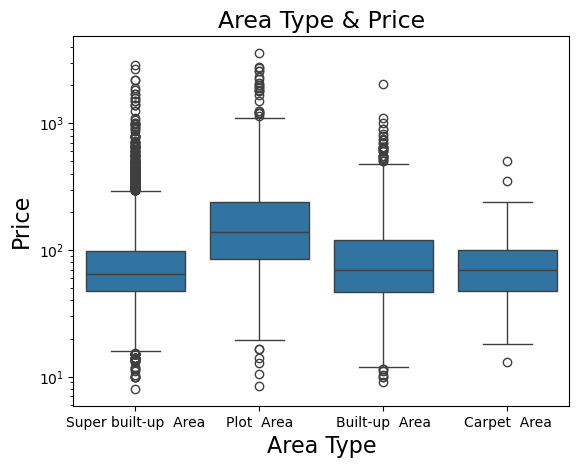

In [8]:
# Plot to show different Area Type and Price comparision
import matplotlib.pyplot as plt
import seaborn as sns
plt.yscale('log')
ax = sns.boxplot(x='area_type',y='price',data=data)
ax.set_xlabel('Area Type',fontdict={'fontsize':16})
ax.set_ylabel('Price',fontdict={'fontsize':16})
ax.set_title('Area Type & Price',fontdict={'fontsize':17})

In [9]:
# Let's check the 
data['availability'].value_counts()

availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64

In [10]:
data.drop(columns=['area_type', 'society', 'availability'], axis=1, inplace=True)

In [11]:
# Fixing 'size' colunn.
data['bhk'] = data['size'].str.split().str.get(0).astype(int)

In [12]:
# Dropping the size columnn as it is not required anymore
data.drop(columns='size', inplace=True)

In [13]:
# There are some values that have a hyphen '-' in them in 'total_sqft' column
data['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [14]:
# Defining a function to fix 'total_sqft' column
def convertRange(x):
    temp = x.split('-')
    if len(temp) == 2:
        return (float(temp[0])+float(temp[1]))/2
    try:
        return float(x)
    except:
        return None

In [15]:
data['total_sqft'] = data['total_sqft'].apply(convertRange)

In [16]:
data.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [17]:
# converting 'bath' & 'balcony' column to int type
data['bath'] = data['bath'].astype('int')
data['balcony'] = data['balcony'].astype('int')

# Price per square feet

In [18]:
data['price_per_sqft'] = data['price']*100000/data['total_sqft']

In [19]:
data.head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2,1,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5,3,120.00,4,4615.384615
2,Uttarahalli,1440.0,2,3,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3,1,95.00,3,6245.890861
4,Kothanur,1200.0,2,1,51.00,2,4250.000000


In [20]:
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.603378,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.803067,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [21]:
data['location'].value_counts()

location
Whitefield                        541
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [22]:
data['location'] = data['location'].apply(lambda x: x.strip() if isinstance(x, str) else x)
location_count = data.location.value_counts()

In [23]:
location_count_l10 = location_count[location_count<=10]
location_count_l10

location
Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1053, dtype: int64

In [24]:
data['location'] = data['location'].apply(lambda x: 'other' if x in location_count_l10 else x)

In [25]:
data.location.value_counts()

location
other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [26]:
data.describe()

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,13274.000000,13320.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,1.603378,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,0.803067,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,0.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,2.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3.000000,3600.000000,43.000000,1.200000e+07


In [27]:
(data['total_sqft']/data['bhk']).describe()

count    13274.000000
mean       575.074878
std        388.205175
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

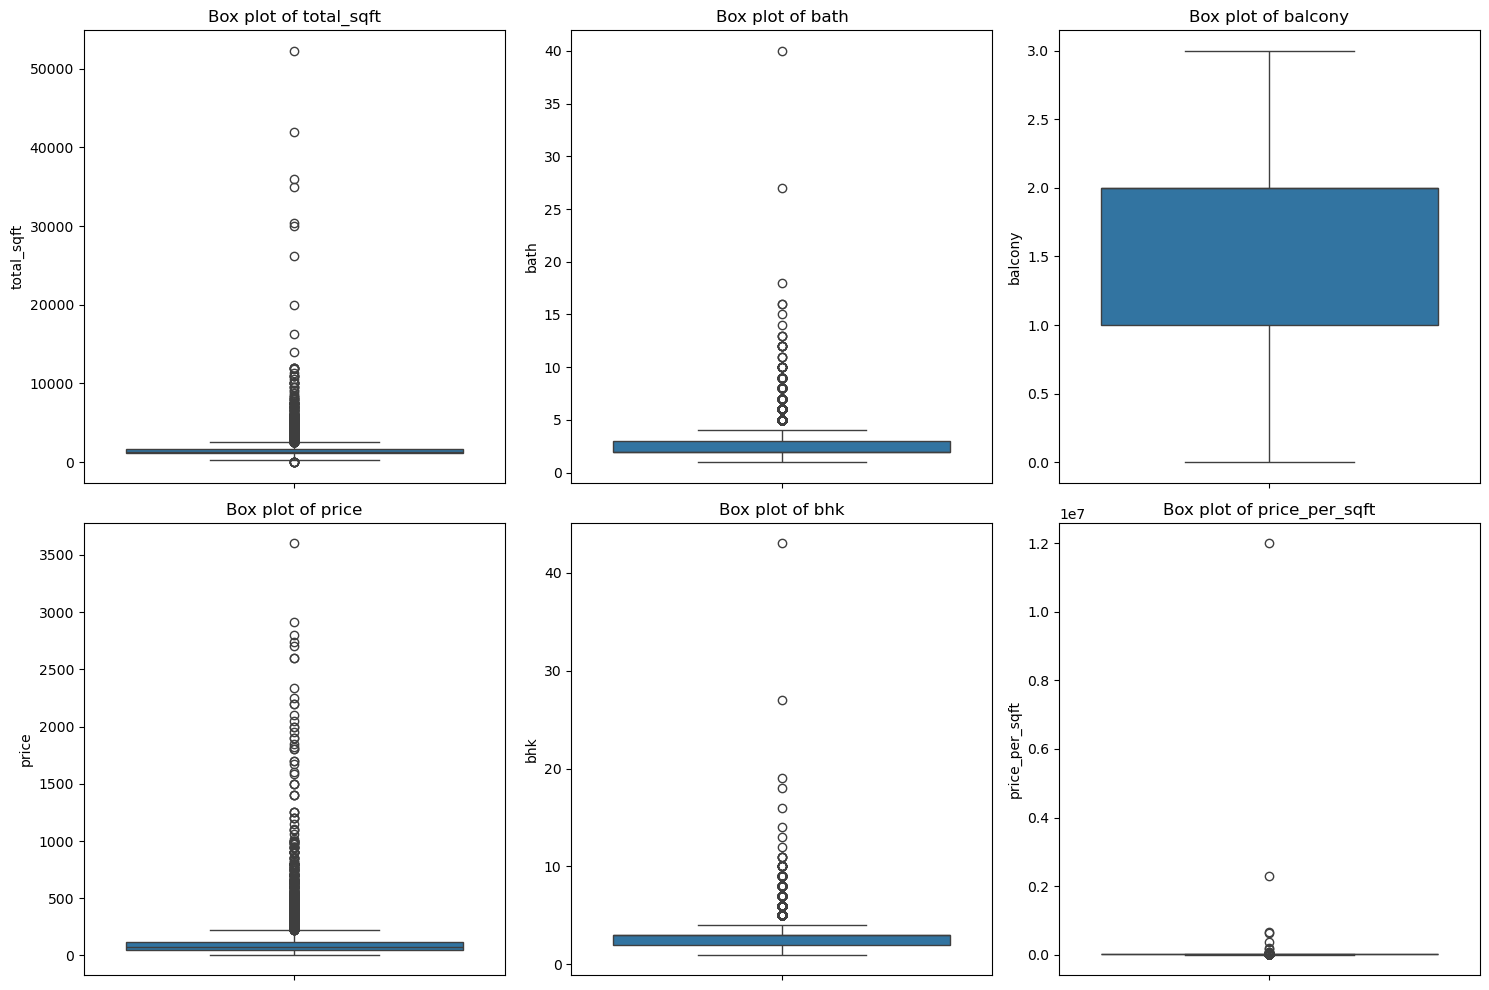

In [28]:
# Plotting univariate box plots for all numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

# Oulier Removal

In [29]:
# we are removing outliers beyond one standard deviation
def remove_outliers_sqft(df):
    df_output = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        gen_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
        df_output=pd.concat([df_output,gen_df], ignore_index=True)
    return df_output
data=remove_outliers_sqft(data)
data.describe()        

,total_sqft,bath,balcony,price,bhk,price_per_sqft
count,11488.000000,11488.000000,11488.000000,11488.000000,11488.000000,11488.000000
mean,1537.976810,2.605066,1.605066,105.238232,2.719185,6303.086658
std,1145.700742,1.208022,0.793965,138.520527,1.152969,3636.502296
min,250.000000,1.000000,0.000000,8.000000,1.000000,267.829813
25%,1100.000000,2.000000,1.000000,50.000000,2.000000,4285.714286
50%,1280.000000,2.000000,2.000000,70.000000,3.000000,5311.170467
75%,1660.000000,3.000000,2.000000,110.000000,3.000000,6849.601172
max,52272.000000,27.000000,3.000000,3600.000000,27.000000,53150.000000


In [30]:
def bhk_outlier_remover(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices, axis='index')

The function `bhk_outlier_remover` removes rows from the DataFrame where the price_per_sqft is unusually low compared
to the mean price_per_sqft of properties with one less bedroom `(bhk-1)` in the same location, provided there are more 
than 5 properties in the `bhk-1` group. This is done to remove unusually cheap properties that might be outliers.

# Methodology

## Ensuring Fair Comparisons
**1. Standardization:** By comparing price per square foot (price_per_sqft) within the same location and across properties 
with different bedroom counts (BHK), the method standardizes the data. This helps in identifying properties that are 
priced unusually low for their category.

**2. Relevance:** Properties with the same number of bedrooms in the same location should have similar price per square 
foot values. By identifying properties that deviate significantly from this norm, the method ensures that the dataset 
reflects realistic market conditions.
## Removing Unrealistic Data Points.
**1. Accuracy:** Properties priced significantly lower than similar properties are likely to be data errors, distressed sales, or properties with undisclosed issues. Removing these ensures that the model is trained on data that reflects typical market behavior.

**2. Market Consistency:** By focusing on price per square foot, the method accounts for variations in property sizes and ensures that all data points used for training are consistent with market norms. This leads to a more reliable model that can make better predictions.
## Improving Model Performance
**1. Reduction of Noise:** Outliers can skew the model, leading to inaccurate predictions. By removing properties with unusually low prices per square foot, the method reduces noise in the data, improving the model's performance.

**2. Focus on Typical Transactions:** The method ensures that the model is trained on typical transactions, which are more relevant for most business applications. This makes the model more robust and useful for pricing strategies, investment decisions, and market analysis.
## Building Trust with Stakeholders
**1. Data Integrity:** Stakeholders, such as investors, real estate agents, and clients, need to trust the model's predictions. By ensuring the dataset is free of unrealistic outliers, the method enhances the credibility of the predictions.

**2. Business Decisions:** Accurate and reliable predictions are crucial for making informed business decisions. Whether it's setting the price for a property, assessing the value of an investment, or understanding market trends, having a clean and realistic dataset is vital.

In [31]:
# Calling the function
data=bhk_outlier_remover(data)

In [32]:
data.shape

(8040, 7)

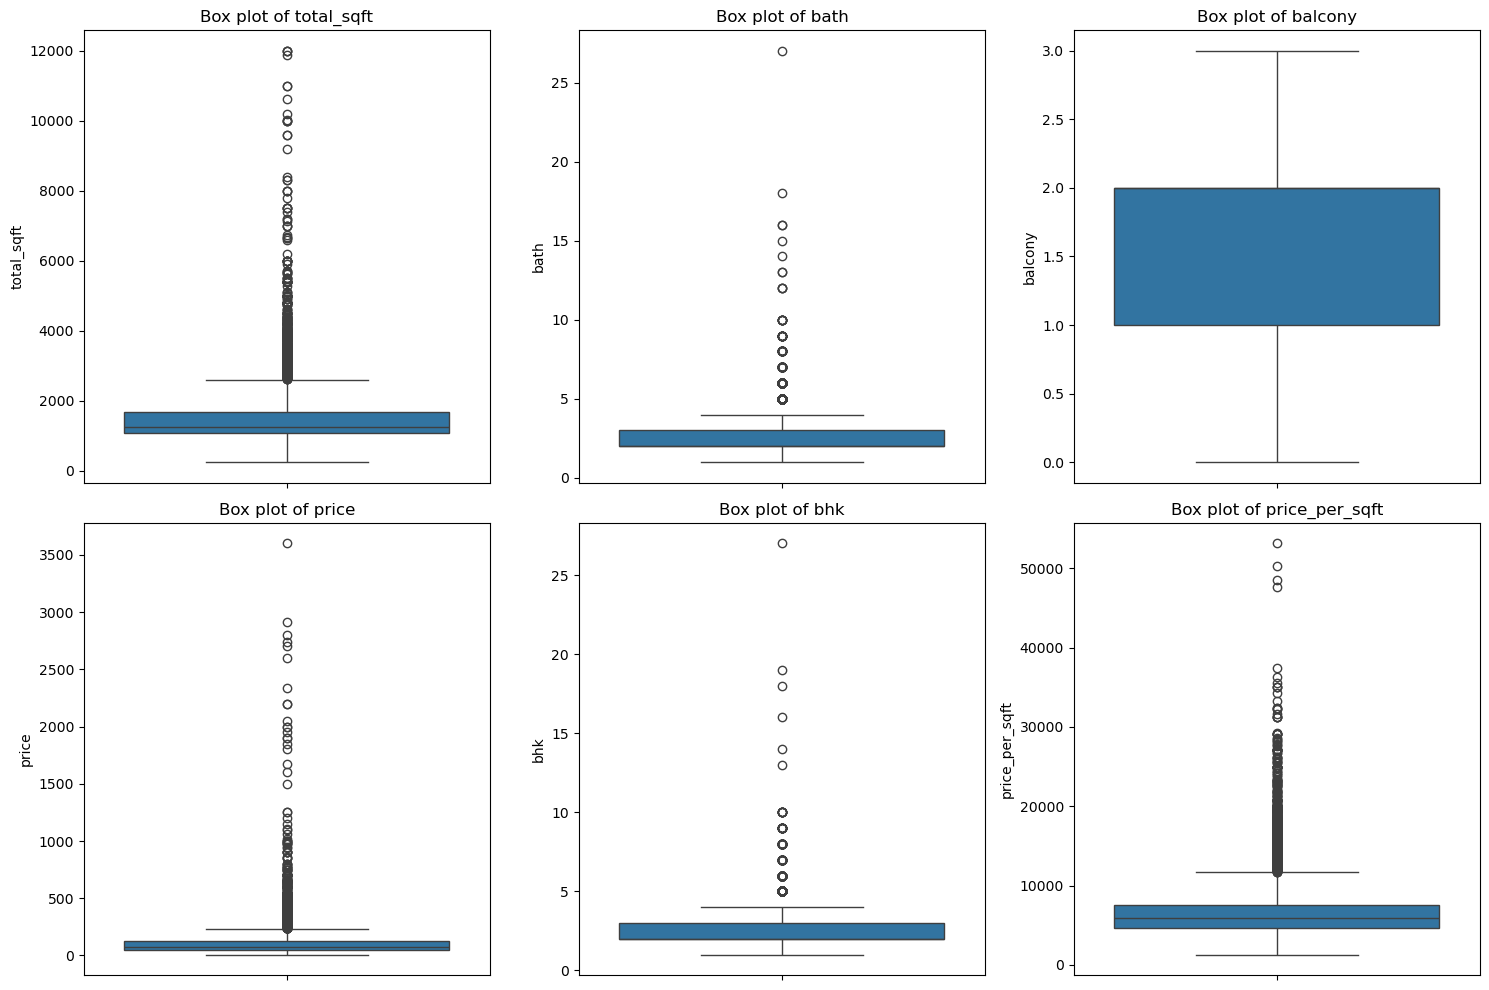

In [33]:
# Plotting univariate box plots for all numeric columns
numeric_columns = data.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)  # Adjust the number of rows and columns as needed
    sns.boxplot(y=data[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()

In [34]:
data.shape

(8040, 7)

In [35]:
# Dropping the 'price_per_sqft' column as it is not needed for the prediction
data.drop(columns='price_per_sqft', inplace=True)

# Cleaned Data

In [36]:
# Checking the cleaned data
data.head()

,location,total_sqft,bath,balcony,price,bhk
0,1st Block Jayanagar,2850.0,4,1,428.0,4
1,1st Block Jayanagar,1630.0,3,2,194.0,3
2,1st Block Jayanagar,1200.0,6,2,125.0,6
3,1st Block Jayanagar,1875.0,2,3,235.0,3
4,1st Block Jayanagar,930.0,4,2,85.0,7


In [37]:
# Exporting the cleaned data to csv for further use
data.to_csv('Cleaned_data.csv')

In [38]:
# Splitting the dataset into Feature and target column
X = data.drop(columns='price')
y = data['price']

In [39]:
# Checking the shape of X and y
X.shape, y.shape

((8040, 5), (8040,))

In [40]:
# Importing all the libraries required to build a pipeline and fit model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.metrics import r2_score, mean_absolute_percentage_error
from sklearn.pipeline import make_pipeline

In [41]:
# Splitting data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Checking the shape of the train and test sets
print(X_train.shape)
print(X_test.shape)

(6432, 5)
(1608, 5)


In [43]:
column_trans = make_column_transformer((OneHotEncoder(sparse_output=False), ['location']), remainder='passthrough') # Instanciating one hot encoder
scaler = StandardScaler() # Instanciating Standard Scaler

# Applying Random Forrest

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
pipe_rfr = make_pipeline(column_trans, scaler, rfr)
pipe_rfr.fit(X_train, y_train)

c:\Users\Anubhav Prasad\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [46]:
# Predicting on test set
y_pred_rfr = pipe_rfr.predict(X_test)

In [47]:
# Printing evaluation metrics for the model
print(f"R-square: {r2_score(y_pred_rfr, y_test): .2f}")
print(f'MAPE: {mean_absolute_percentage_error(y_pred_rfr, y_test): .2f}')

R-square:  0.72
MAPE:  0.18


# Applying Gradient Boost

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

In [49]:
gboost = GradientBoostingRegressor()
pipe_gb = make_pipeline(column_trans, scaler, gboost)
pipe_gb.fit(X_train, y_train)

c:\Users\Anubhav Prasad\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [50]:
# Predicting on test set
y_pred_gb = pipe_gb.predict(X_test)

In [51]:
# Printing results for the model
print(f"R-square: {r2_score(y_pred_gb, y_test): .2f}")
print(f'MAPE: {mean_absolute_percentage_error(y_pred_gb, y_test): .2f}')

R-square:  0.71
MAPE:  0.22


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'randomforestregressor__n_estimators': randint(100, 500),
    'randomforestregressor__max_depth': [None, 10, 20, 30, 40, 50],
    'randomforestregressor__min_samples_split': randint(2, 11),
    'randomforestregressor__min_samples_leaf': randint(1, 5)
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(pipe_rfr, param_distributions=param_dist, n_iter=100, cv=5, scoring='r2', n_jobs=-1, verbose=2, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best R-square Score: {best_score}")

# Use the best estimator to make predictions
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Print evaluation metrics for the best model
print(f"R-square: {r2_score(y_pred_best, y_test): .2f}")
print(f'MAPE: {mean_absolute_percentage_error(y_pred_best, y_test): .2f}')

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'randomforestregressor__max_depth': 30, 'randomforestregressor__min_samples_leaf': 1, 'randomforestregressor__min_samples_split': 9, 'randomforestregressor__n_estimators': 288}
Best R-square Score: 0.714984516617772
R-square:  0.72
MAPE:  0.18


In [ ]:
import pickle
pickle.dump(best_model, open('RandomForest_best.pkl', 'wb'))